<a href="https://colab.research.google.com/github/mrGHASSAN/Final-Projct/blob/main/PCAandML_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  ## for data visualization
import seaborn as sns  ## for data visualization
sns.set()  ## setting default theme of visualization to seaborn skins
sns.set_theme(style="darkgrid")  ## setting default theme of visualization to seaborn skins
plt.rcParams['figure.figsize'] = (7,5)  ## setting default visualization size

## For Handling Datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Importing ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Performance Metrics
import time
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
print("Pandas version: ", pd.__version__)  ## Pandas Version
print("Seaborn version: ", sns.__version__)  ## Seaborn Version

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [11]:
## mounting google drive

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Loading Dataset

In [13]:
## reading csv file into dataframe

df = pd.read_csv('https://raw.githubusercontent.com/mrGHASSAN/Final-Projct/main/Pistachio_16_Features_Dataset.csv')
df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0037         0.5297         0.8734  Kirmizi_Pistachio  
1         0.0034         0.5156         0.9024  Kirmizi_Pistachio  
2         0.0030         0.4579         0.9391  Kirmizi_Pistachio  
3         0.0030         0.4907         0.9755  Kirmizi_Pistachio  
4         0.0028         0.4628         0.9833  Kirmizi_Pistachio

### Data Infromation
Data types, missing calues, duplicated records, etc.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           2148 non-null   int64  
 1   PERIMETER      2148 non-null   float64
 2   MAJOR_AXIS     2148 non-null   float64
 3   MINOR_AXIS     2148 non-null   float64
 4   ECCENTRICITY   2148 non-null   float64
 5   EQDIASQ        2148 non-null   float64
 6   SOLIDITY       2148 non-null   float64
 7   CONVEX_AREA    2148 non-null   int64  
 8   EXTENT         2148 non-null   float64
 9   ASPECT_RATIO   2148 non-null   float64
 10  ROUNDNESS      2148 non-null   float64
 11  COMPACTNESS    2148 non-null   float64
 12  SHAPEFACTOR_1  2148 non-null   float64
 13  SHAPEFACTOR_2  2148 non-null   float64
 14  SHAPEFACTOR_3  2148 non-null   float64
 15  SHAPEFACTOR_4  2148 non-null   float64
 16  Class          2148 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 28

In [15]:
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  0


In [16]:
print("Number of rows with missing values: ", df.isna().any(axis=1).sum())

Number of rows with missing values:  0


### Exploratory Data Analysis

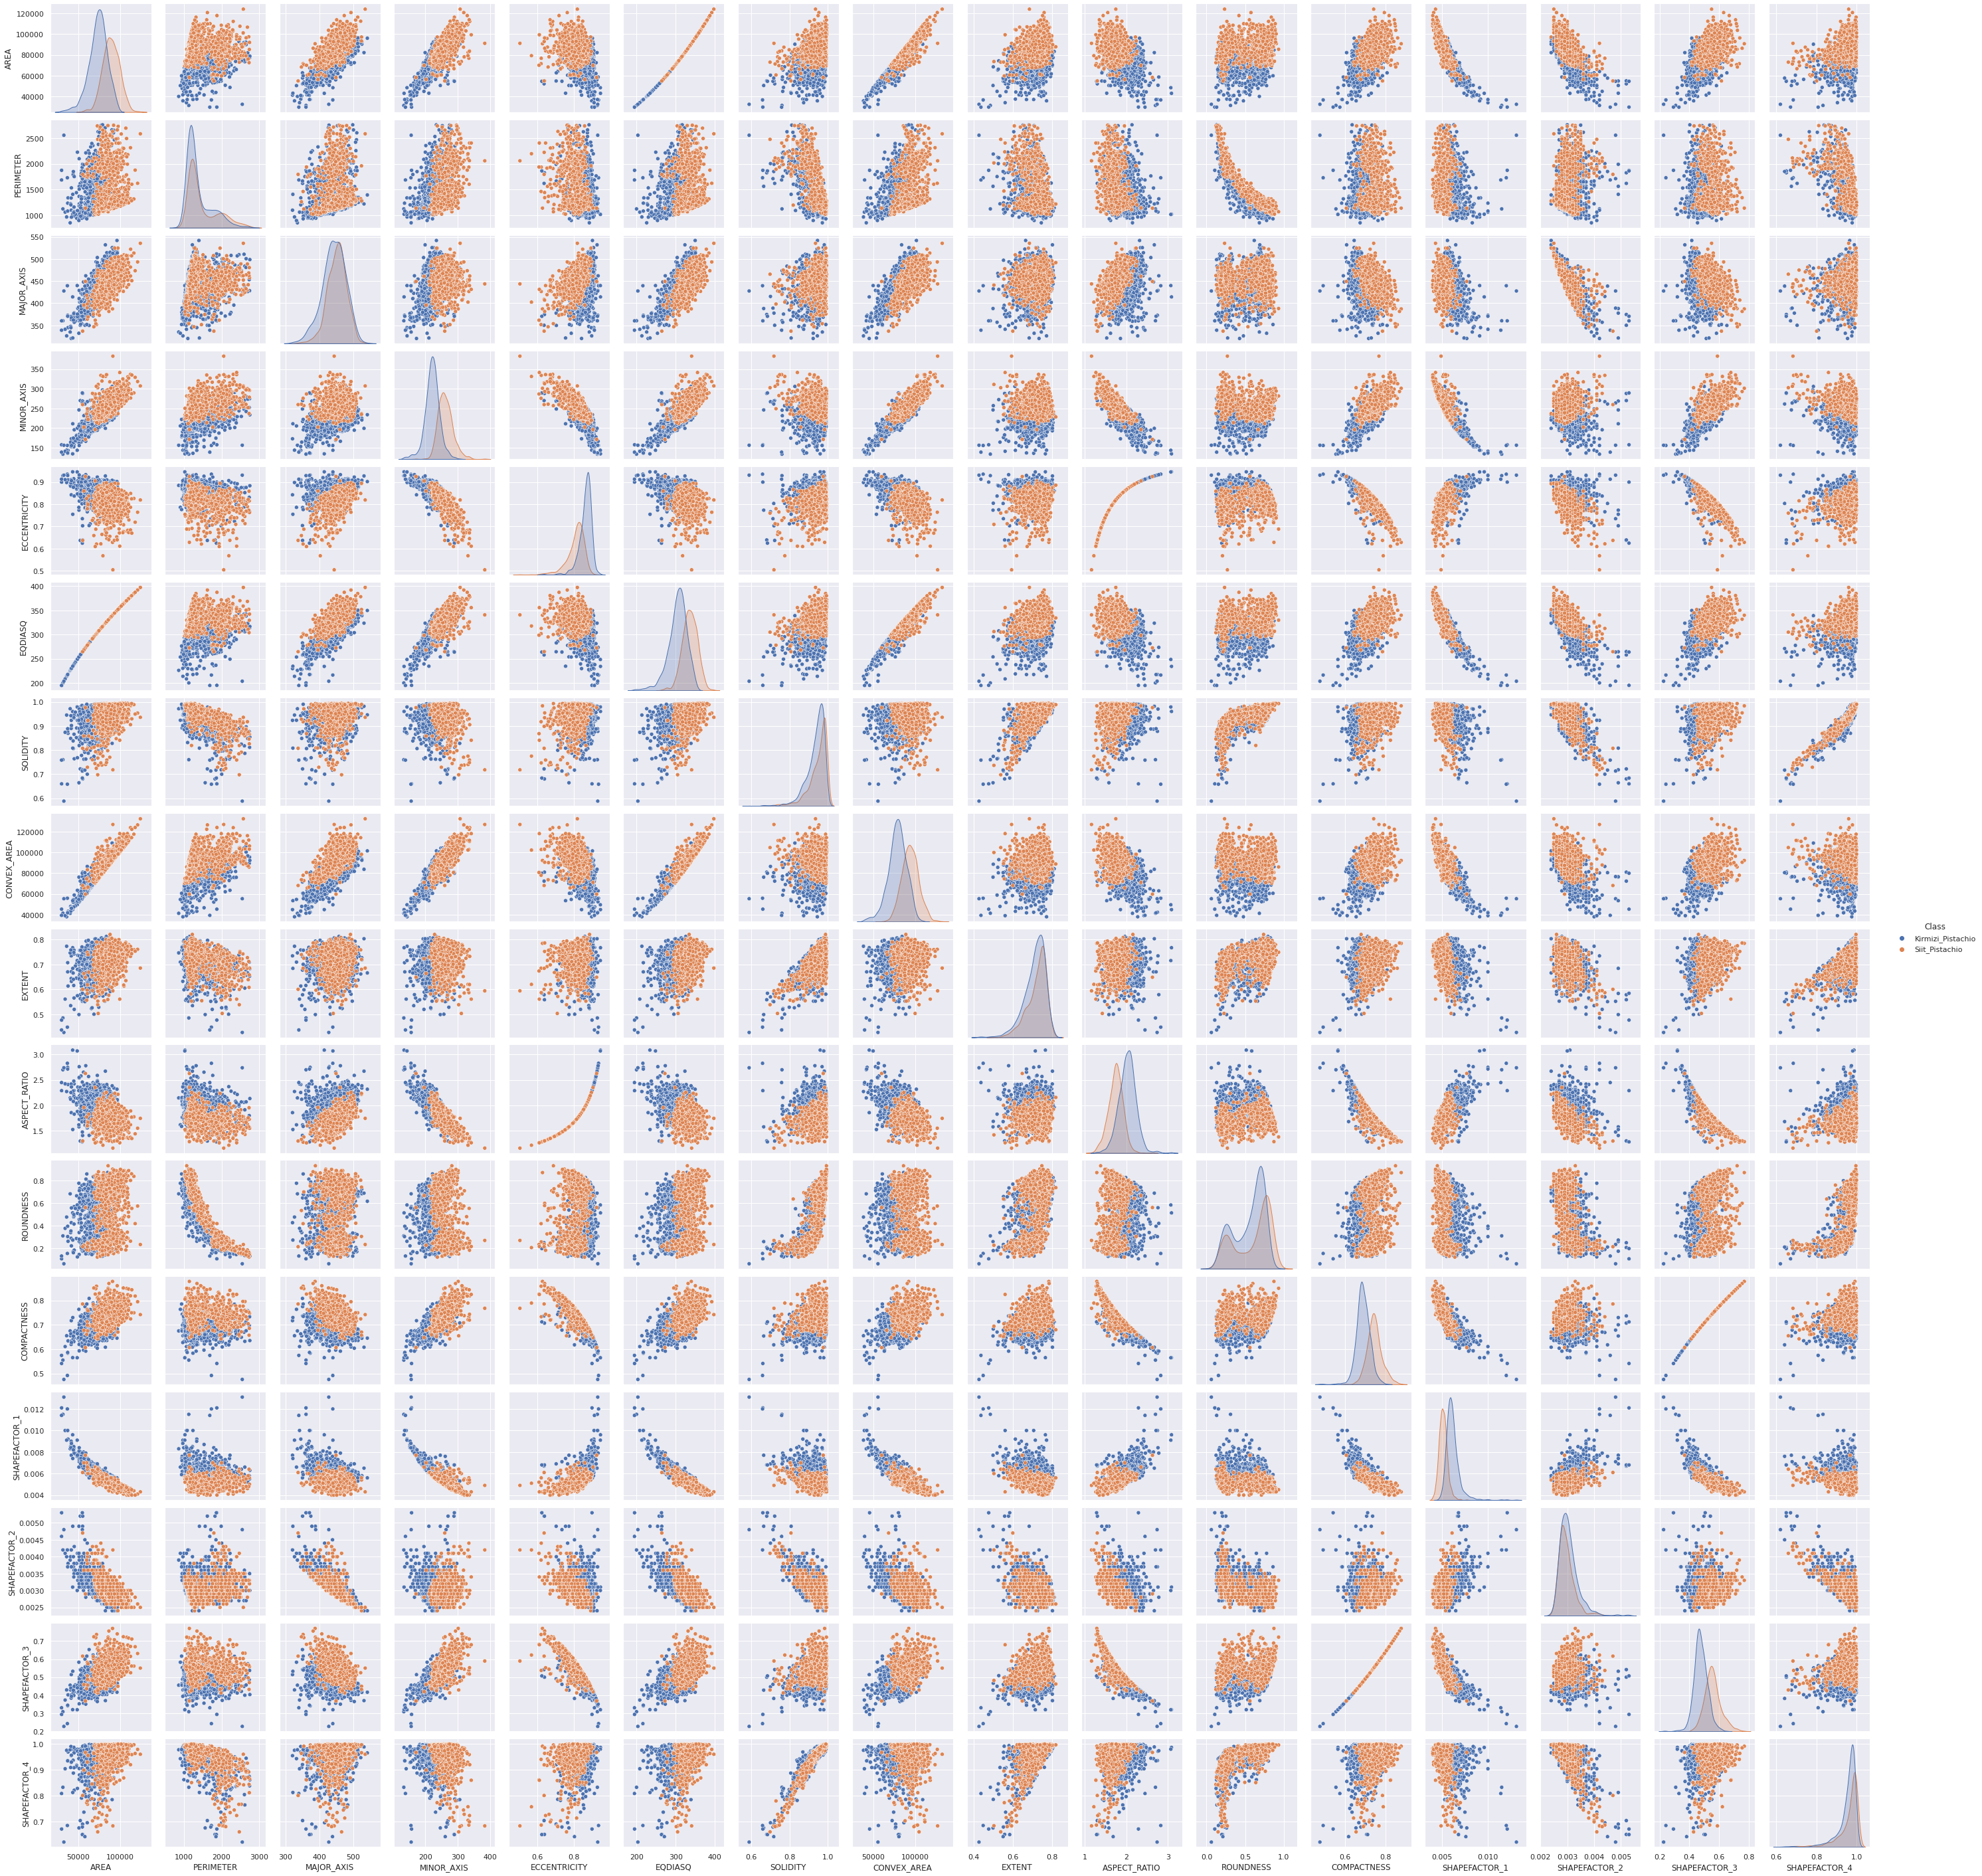

In [17]:
## pairplot

sns.pairplot(df, hue='Class')
plt.show()

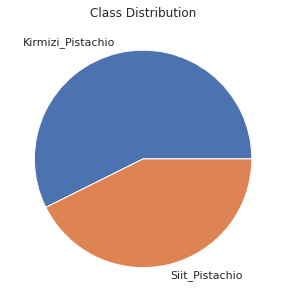

In [18]:
## balance of class in the dataset

y = df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Class Distribution')
plt.show()

### Declaring and Exploring Feature Variables

In [19]:
X = df.drop(columns=['Class'])
X.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
0         0.0037         0.5297         0.8734  
1         0.0034         0.5156         0.9024  
2         0.0030         0.4579         0.9391  
3         0.0030         0.4907         0.9755  
4         0.0028         0.4628         0.9833

In [20]:
X.describe().transpose()

count          mean           std         min           25%  \
AREA           2148.0  79950.655493  13121.737799  29808.0000  71936.750000   
PERIMETER      2148.0   1425.971751    375.565503    858.3630   1170.996250   
MAJOR_AXIS     2148.0    446.248968     32.445304    320.3445    426.508750   
MINOR_AXIS     2148.0    238.311842     30.310695    133.5096    217.875825   
ECCENTRICITY   2148.0      0.840219      0.048759      0.5049      0.817500   
EQDIASQ        2148.0    317.919173     26.908600    194.8146    302.642850   
SOLIDITY       2148.0      0.940093      0.050452      0.5880      0.919850   
CONVEX_AREA    2148.0  85015.839851  13154.919327  37935.0000  76467.000000   
EXTENT         2148.0      0.716067      0.052532      0.4272      0.687000   
ASPECT_RATIO   2148.0      1.898154      0.240100      1.1585      1.736375   
ROUNDNESS      2148.0      0.569172      0.212760      0.0628      0.371250   
COMPACTNESS    2148.0      0.713077      0.044547      0.4760      0.681550   
SHAPEFACTOR_1  2148.0      0.005701      0.000817      0.0040      0.005200   
SHAPEFACTOR_2  2148.0      0.003017      0.000340      0.0024      0.002800   
SHAPEFACTOR_3  2148.0      0.510461      0.063942      0.2266      0.464475   
SHAPEFACTOR_4  2148.0      0.955239      0.051840      0.6204      0.944000   

                       50%           75%          max  
AREA           79905.50000  89030.500000  124008.0000  
PERIMETER       1262.78550   1607.906250    2755.0491  
MAJOR_AXIS       448.57475    468.509400     541.9661  
MINOR_AXIS       236.41635    257.760150     383.0461  
ECCENTRICITY       0.84965      0.875200       0.9460  
EQDIASQ          318.96530    336.685525     397.3561  
SOLIDITY           0.95415      0.976925       0.9951  
CONVEX_AREA    85075.50000  93893.500000  132478.0000  
EXTENT             0.72650      0.753600       0.8204  
ASPECT_RATIO       1.89625      2.067025       3.0858  
ROUNDNESS          0.64340      0.744125       0.9336  
COMPACTNESS        0.71070      0.741650       0.8779  
SHAPEFACTOR_1      0.00560      0.006100       0.0131  
SHAPEFACTOR_2      0.00300      0.003200       0.0053  
SHAPEFACTOR_3      0.50515      0.550075       0.7706  
SHAPEFACTOR_4      0.97310      0.987300       0.9990

### Standardization of Feature Variables

In [21]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0 -1.262296   0.379338   -1.723590   -0.051668     -0.925560 -1.257169   
1 -0.883675   1.374821   -1.090999   -0.117456     -0.400406 -0.851241   
2 -0.484931  -0.477881    0.188485   -0.585974      0.674518 -0.439385   
3 -0.674203   0.051373   -0.515445   -0.733752      0.493996 -0.632989   
4  0.010393  -0.464602    0.713037   -0.573444      0.863245  0.052342   

   SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0 -1.459003    -0.901457 -1.459763     -1.038784  -1.153550     0.330588   
1 -1.260749    -0.534133 -0.740038     -0.616362  -1.605338     0.112790   
2 -0.453857    -0.363587 -0.064106      0.636739   0.121894    -0.816778   
3  0.372861    -0.825955 -0.252605      0.373871  -0.664622    -0.282389   
4  0.507673    -0.158673  0.568033      0.942933   0.344732    -0.735946   

   SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
0       0.610410       2.010131       0.300945      -1.579031  
1       0.365630       1.126973       0.080381      -1.019493  
2       0.488020      -0.050572      -0.822209      -0.311387  
3       0.365630      -0.050572      -0.309125       0.390931  
4       0.243241      -0.639344      -0.745559       0.541427

In [22]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
AREA           2148.0  1.587805e-16  1.000233 -3.822232 -0.610877 -0.003442   
PERIMETER      2148.0  4.631098e-16  1.000233 -1.511696 -0.679069 -0.434609   
MAJOR_AXIS     2148.0  8.600610e-16  1.000233 -3.881418 -0.608557  0.071700   
MINOR_AXIS     2148.0  5.821952e-16  1.000233 -3.458405 -0.674375 -0.062550   
ECCENTRICITY   2148.0 -1.587805e-16  1.000233 -6.878673 -0.466051  0.193469   
EQDIASQ        2148.0 -1.746585e-15  1.000233 -4.575981 -0.567844  0.038886   
SOLIDITY       2148.0  1.488567e-15  1.000233 -6.980366 -0.401320  0.278690   
CONVEX_AREA    2148.0 -2.117073e-16  1.000233 -3.579787 -0.650010  0.004536   
EXTENT         2148.0  6.285061e-16  1.000233 -5.500124 -0.553443  0.198651   
ASPECT_RATIO   2148.0 -7.409757e-16  1.000233 -3.081323 -0.673956 -0.007933   
ROUNDNESS      2148.0 -9.923781e-17  1.000233 -2.380572 -0.930477  0.348964   
COMPACTNESS    2148.0 -9.526830e-16  1.000233 -5.323167 -0.707880 -0.053364   
SHAPEFACTOR_1  2148.0 -2.646342e-16  1.000233 -2.082162 -0.613487 -0.123928   
SHAPEFACTOR_2  2148.0 -6.218903e-16  1.000233 -1.816889 -0.639344 -0.050572   
SHAPEFACTOR_3  2148.0  2.117073e-16  1.000233 -4.440393 -0.719358 -0.083086   
SHAPEFACTOR_4  2148.0  1.164390e-15  1.000233 -6.460524 -0.216844  0.344624   

                    75%       max  
AREA           0.692131  3.358366  
PERIMETER      0.484541  3.539694  
MAJOR_AXIS     0.686251  2.950794  
MINOR_AXIS     0.641781  4.776135  
ECCENTRICITY   0.717597  2.169976  
EQDIASQ        0.697573  2.952789  
SOLIDITY       0.730213  1.090539  
CONVEX_AREA    0.675012  3.608780  
EXTENT         0.714644  1.986539  
ASPECT_RATIO   0.703498  4.947609  
ROUNDNESS      0.822495  1.713261  
COMPACTNESS    0.641567  3.700837  
SHAPEFACTOR_1  0.488020  9.055294  
SHAPEFACTOR_2  0.538200  6.720309  
SHAPEFACTOR_3  0.619668  4.069300  
SHAPEFACTOR_4  0.618605  0.844350

In [23]:
observations = list(df.index)  ## records' index
variables = list(df.columns)  ## column names

### Box and Whisker Plots

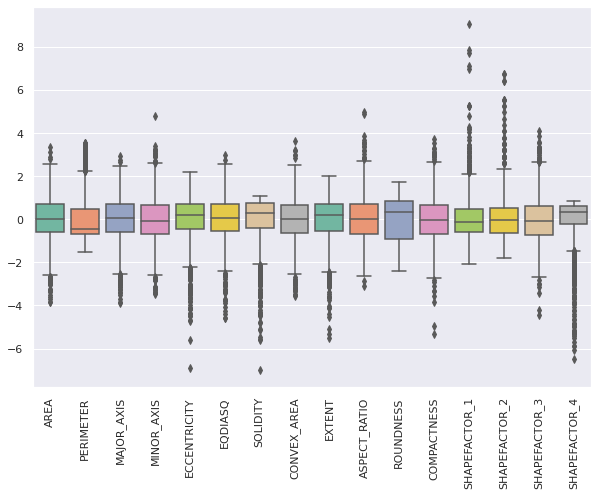

In [24]:
ax = plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

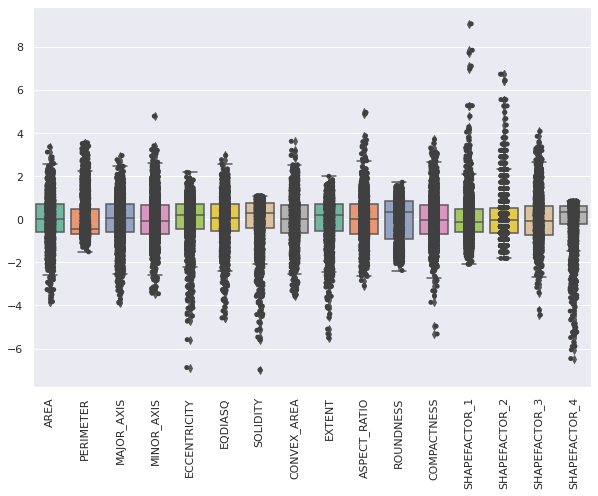

In [25]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure(figsize=(10, 7))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

### Correlation Matrix

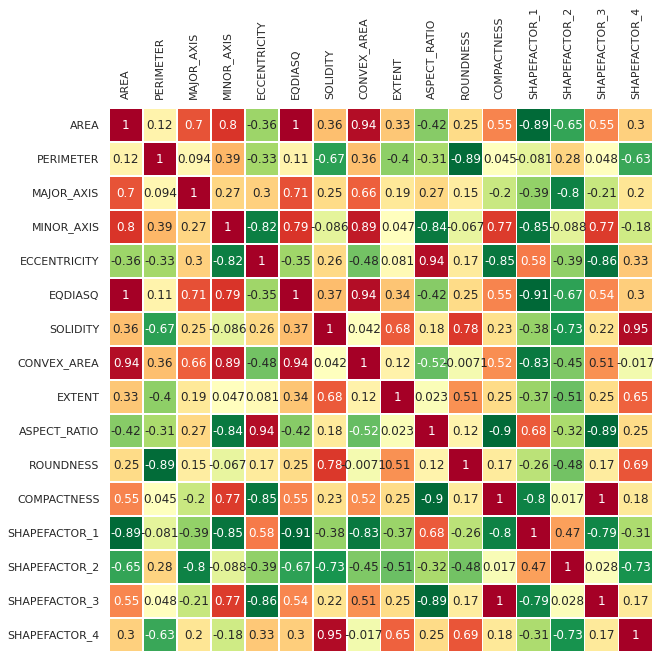

In [26]:
ax = plt.figure(figsize=(10, 10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Principle Component Analysis

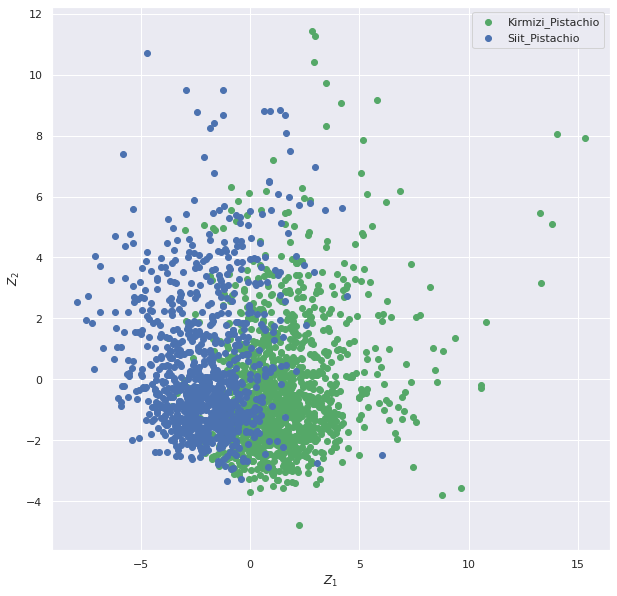

In [27]:
pca = PCA()
Z = pca.fit_transform(X)

idx_Kirmizi = np.where(y == 'Kirmizi_Pistachio')
idx_Siit = np.where(y == 'Siit_Pistachio')

plt.figure(figsize=(10, 10))
plt.scatter(Z[idx_Kirmizi,0], Z[idx_Kirmizi,1], c='g', label='Kirmizi_Pistachio')
plt.scatter(Z[idx_Siit,0], Z[idx_Siit,1], c='b', label='Siit_Pistachio')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()

### Eigenvectors

Eigen Vectors
[[-3.43225310e-01 -8.23858059e-02 -2.01879905e-01  6.81601148e-02
  -7.97785517e-03  2.16527271e-01  4.57046470e-03  2.80008688e-01
   2.78249325e-01  3.97860164e-02 -1.00751504e-02 -1.71938292e-01
  -6.13767970e-01 -1.45393245e-01  4.00123311e-01 -1.94975200e-01]
 [-3.70030587e-02  3.22032330e-01 -3.34637071e-01 -4.89860866e-01
  -1.60786107e-01 -1.31124113e-01  3.87472821e-01  3.87348877e-01
  -4.31906603e-01  1.08935733e-01  3.08056764e-02 -7.49327632e-03
  -1.40433502e-02 -1.17916316e-02  1.43681279e-03 -2.54967885e-03]
 [-1.43298057e-01 -2.02733771e-01 -4.89951693e-01  1.39485998e-01
   1.21546913e-01 -1.76146489e-02  1.30133226e-01 -1.79377889e-01
   2.00310742e-02  2.80953878e-01 -5.01262065e-01 -1.40392943e-01
   3.92591353e-01  1.86978048e-01  1.41052895e-01 -2.35299439e-01]
 [-3.34277798e-01  1.82080549e-01 -7.13138502e-02  1.25981653e-01
   1.21320010e-01  4.87246983e-02  1.53675058e-01 -2.98963741e-02
   7.55721101e-02 -2.75321767e-01  3.42451647e-01  3.247481

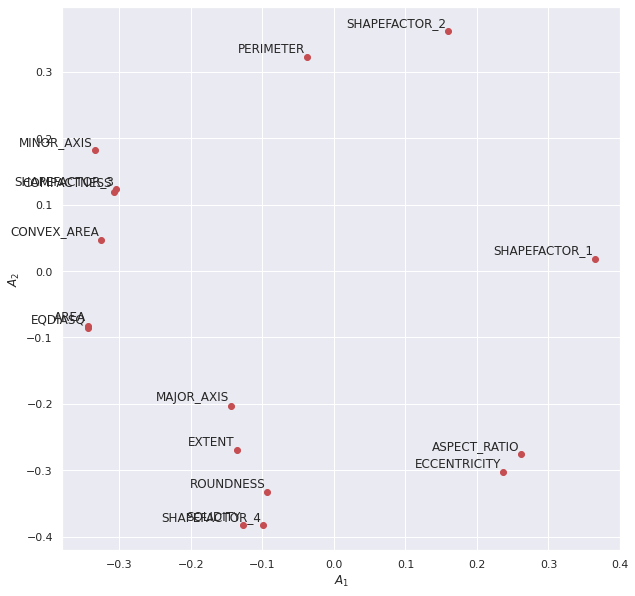

In [34]:
A = pca.components_.T 
print ("Eigen Vectors")
print(A)
plt.figure(figsize=(10, 10))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

### Eigen Vector Matrix

In [29]:
A

array([[-3.43225310e-01, -8.23858059e-02, -2.01879905e-01,
         6.81601148e-02, -7.97785517e-03,  2.16527271e-01,
         4.57046470e-03,  2.80008688e-01,  2.78249325e-01,
         3.97860164e-02, -1.00751504e-02, -1.71938292e-01,
        -6.13767970e-01, -1.45393245e-01,  4.00123311e-01,
        -1.94975200e-01],
       [-3.70030587e-02,  3.22032330e-01, -3.34637071e-01,
        -4.89860866e-01, -1.60786107e-01, -1.31124113e-01,
         3.87472821e-01,  3.87348877e-01, -4.31906603e-01,
         1.08935733e-01,  3.08056764e-02, -7.49327632e-03,
        -1.40433502e-02, -1.17916316e-02,  1.43681279e-03,
        -2.54967885e-03],
       [-1.43298057e-01, -2.02733771e-01, -4.89951693e-01,
         1.39485998e-01,  1.21546913e-01, -1.76146489e-02,
         1.30133226e-01, -1.79377889e-01,  2.00310742e-02,
         2.80953878e-01, -5.01262065e-01, -1.40392943e-01,
         3.92591353e-01,  1.86978048e-01,  1.41052895e-01,
        -2.35299439e-01],
       [-3.34277798e-01,  1.82080549e

### Scree plot

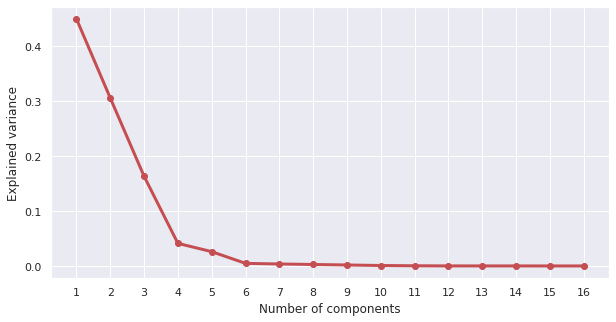

In [35]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.figure(figsize=(10, 5))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

### Eigen Values

In [36]:
for i in x:
  print (Lambda[i-1])

7.200305633712951
4.894691680121948
2.6142423482129957
0.6577247499778898
0.4164439679513672
0.07511111901910501
0.057213308205863775
0.04231970325982278
0.028253543082568215
0.01288922877042742
0.005497987120076289
0.001219187663112048
0.0007448392181776378
0.0006667071186533025
7.942596670706354e-05
4.8829564351690735e-05


### Explained Variance

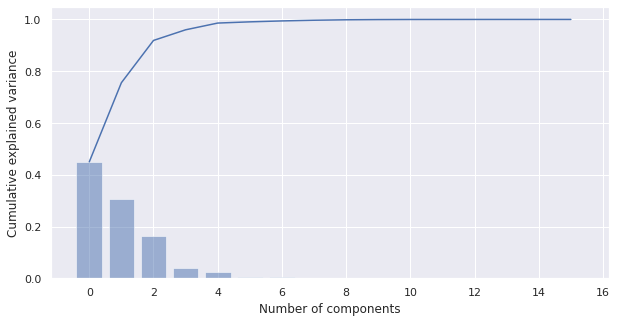

In [37]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))

plt.figure(figsize=(10, 5))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Biplot (PC1 and PC2)

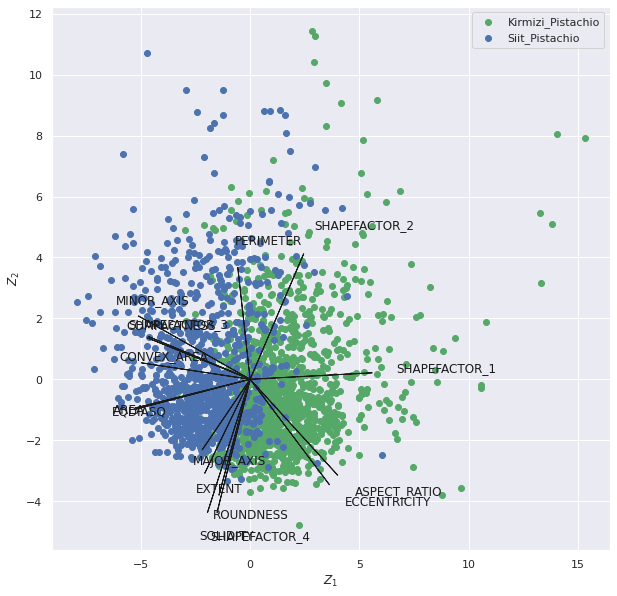

In [38]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure(figsize=(10, 10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Kirmizi,0], Z[idx_Kirmizi,1], c='g', label='Kirmizi_Pistachio')
plt.scatter(Z[idx_Siit,0], Z[idx_Siit,1], c='b', label='Siit_Pistachio')
plt.legend(loc='upper right')
plt.show()

### Machine Learning
#### A) Machine Learning with full dataset

In [39]:
## head of full data

df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  63391   1568.405    390.3396    236.7461        0.7951  284.0984    0.8665   
1  68358   1942.187    410.8594    234.7525        0.8207  295.0188    0.8765   
2  73589   1246.538    452.3630    220.5547        0.8731  306.0987    0.9172   
3  71106   1445.261    429.5291    216.0765        0.8643  300.8903    0.9589   
4  80087   1251.524    469.3783    220.9344        0.8823  319.3273    0.9657   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        73160  0.6394        1.6488     0.3238       0.7278         0.0062   
1        77991  0.6772        1.7502     0.2277       0.7181         0.0060   
2        80234  0.7127        2.0510     0.5951       0.6767         0.0061   
3        74153  0.7028        1.9879     0.4278       0.7005         0.0060   
4        82929  0.7459        2.1245     0.6425       0.6803         0.0059   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0037         0.5297         0.8734  Kirmizi_Pistachio  
1         0.0034         0.5156         0.9024  Kirmizi_Pistachio  
2         0.0030         0.4579         0.9391  Kirmizi_Pistachio  
3         0.0030         0.4907         0.9755  Kirmizi_Pistachio  
4         0.0028         0.4628         0.9833  Kirmizi_Pistachio

In [40]:
## declaring features and target variable

X = df.drop("Class", axis=1)
y = df["Class"]

In [41]:
## splitting the original dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
## creating an empty dataframe to contain the evaluation metrics of all the models

results = pd.DataFrame(columns=["Model", "Accuracy", "Time Taken"])
results.head()

Empty DataFrame
Columns: [Model, Accuracy, Time Taken]
Index: []

In [43]:
## grid search for the optimal Logistic Regression model

params = {'penalty' : ['l1','l2'],
          'C'       : np.logspace(-3,3,7),
          'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

0.8731062151502786
LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
start_time = time.time()

## training model using the optimal found Decision Tree Classifier model and then evaluating its predictions

clf = LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Logistic Regression", accuracy, round(time.time() - start_time, 2)]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [45]:
## grid search for the optimal K Nearest Neighbor Classifier

params = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.7747450020399838
KNeighborsClassifier(n_neighbors=15)


In [46]:
start_time = time.time()

## training model using the optimal found  K Nearest Neighbor Classifier model and then evaluating its predictions

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["KNN Classifier", accuracy, round(time.time() - start_time, 2)]

In [47]:
## grid search for the optimal Decision Tree Classifier model

params = {'max_features': ['sqrt', 'log2'],
          'max_depth' : [10, 20, 30, None],
          'min_samples_split' : [2, 5, 10, 20, 50]}

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8579661362709097
DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=50)


In [49]:
start_time = time.time()

## training model using the optimal found  Decision Tree Classifier model and then evaluating its predictions

clf = DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=50)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Decision Tree", accuracy, round(time.time() - start_time, 2)]

In [48]:
## grid search for the optimal Random Forest Classifier model

param = {'n_estimators': [200, 500, 750, 1000],
         'max_features': ['auto', 'sqrt', 'log2'],
         'max_depth' : [4,5,6,7,8]}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8765775873793011
RandomForestClassifier(max_features='log2', min_samples_split=20)


In [50]:
start_time = time.time()

## training model using the optimal found  Random Forest Classifier model and then evaluating its predictions

clf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=50)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Random Forest Classifier", accuracy, round(time.time() - start_time, 2)]

In [51]:
results

Model  Accuracy  Time Taken
0       Logistic Regression      0.85        0.56
1            KNN Classifier      0.75        0.06
2             Decision Tree      0.85        0.01
3  Random Forest Classifier      0.87        0.49

#### Machine Learning with PC1 - PC4

In [52]:
## transforming input features into principal component

pca = PCA(n_components=4)
X = pca.fit_transform(X)

In [53]:
## splitting the original dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [54]:
## creating an empty dataframe to contain the evaluation metrics of all the models

results = pd.DataFrame(columns=["Model", "Accuracy", "Time Taken"])
results.head()

Empty DataFrame
Columns: [Model, Accuracy, Time Taken]
Index: []

In [55]:
## grid search for the optimal Logistic Regression model

params = {'penalty' : ['l1','l2'],
          'C'       : np.logspace(-3,3,7),
          'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8707772337821297
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver

In [56]:
start_time = time.time()

## training model using the optimal found Decision Tree Classifier model and then evaluating its predictions

clf = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Logistic Regression", accuracy, round(time.time() - start_time, 2)]

In [57]:
## grid search for the optimal K Nearest Neighbor Classifier

params = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.7747450020399838
KNeighborsClassifier(n_neighbors=15)


In [58]:
start_time = time.time()

## training model using the optimal found  K Nearest Neighbor Classifier model and then evaluating its predictions

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["KNN Classifier", accuracy, round(time.time() - start_time, 2)]

In [59]:
## grid search for the optimal Decision Tree Classifier model

params = {'max_features': ['sqrt', 'log2'],
          'max_depth' : [10, 20, 30, None],
          'min_samples_split' : [2, 5, 10, 20, 50]}

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8469026247790017
DecisionTreeClassifier(max_depth=30, max_features='log2', min_samples_split=50)


In [60]:
start_time = time.time()

## training model using the optimal found  Decision Tree Classifier model and then evaluating its predictions

clf = DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=50)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Decision Tree", accuracy, round(time.time() - start_time, 2)]

In [61]:
## grid search for the optimal Random Forest Classifier model

param = {'n_estimators': [200, 500, 750, 1000],
         'max_features': ['auto', 'sqrt', 'log2'],
         'max_depth' : [4,5,6,7,8]}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=0, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.8736570107439141
RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=50)


In [62]:
start_time = time.time()

## training model using the optimal found  Random Forest Classifier model and then evaluating its predictions

clf = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=20)
clf.fit(X_train, y_train)
pred_label = clf.predict(X_test)
accuracy = accuracy_score(pred_label, y_test).round(2)

results.loc[len(results)] = ["Random Forest Classifier", accuracy, round(time.time() - start_time, 2)]

In [63]:
results

Model  Accuracy  Time Taken
0       Logistic Regression      0.85        0.01
1            KNN Classifier      0.75        0.02
2             Decision Tree      0.82        0.01
3  Random Forest Classifier      0.87        0.36